<a href="https://colab.research.google.com/github/Rian021102/Patient_Survival_Rate_Prediction/blob/main/Patient_Survival_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Libraries

In [518]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Train Dataset

In [519]:
url_df = 'https://drive.google.com/file/d/1C6y2Y0EzCYK21-kd-X1g02mtxCVrccfQ/view?usp=share_link'
path_df = 'https://drive.google.com/uc?export=download&id='+url_df.split('/')[-2]
df = pd.read_csv(path_df)

In [520]:
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [521]:
df.columns.to_list()

['ID_Patient_Care_Situation',
 'Diagnosed_Condition',
 'Patient_ID',
 'Treated_with_drugs',
 'Patient_Age',
 'Patient_Body_Mass_Index',
 'Patient_Smoker',
 'Patient_Rural_Urban',
 'Patient_mental_condition',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'Z',
 'Number_of_prev_cond',
 'Survived_1_year']

In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

# Checking Unique Values

In [523]:
df['Diagnosed_Condition'].unique()

array([ 8,  5, 23, 51,  0, 45, 52,  9, 47, 17, 15, 35, 44, 37, 14, 42, 12,
       21, 29, 43, 18, 31, 20,  1, 40, 48, 28, 16, 24, 49, 13,  2, 38,  3,
        6, 39, 46,  4, 27, 19, 26, 34, 33, 41, 22, 50, 36, 11, 10,  7, 32,
       30, 25])

In [524]:
df['Treated_with_drugs'].unique()

array(['DX6', 'DX2 ', 'DX1 ', nan, 'DX3 ', 'DX5 ', 'DX4 ', 'DX2 DX5 ',
       'DX2 DX3 ', 'DX1 DX3 ', 'DX1 DX2 ', 'DX3 DX4 ', 'DX1 DX4 ',
       'DX1 DX5 ', 'DX2 DX4 DX5 ', 'DX1 DX2 DX3 ', 'DX3 DX5 ', 'DX2 DX4 ',
       'DX3 DX4 DX5 ', 'DX2 DX3 DX5 ', 'DX1 DX2 DX3 DX4 ', 'DX4 DX5 ',
       'DX2 DX3 DX4 ', 'DX1 DX4 DX5 ', 'DX1 DX2 DX4 ', 'DX1 DX3 DX5 ',
       'DX1 DX2 DX5 ', 'DX1 DX3 DX4 ', 'DX1 DX3 DX4 DX5 ',
       'DX1 DX2 DX4 DX5 ', 'DX2 DX3 DX4 DX5 ', 'DX1 DX2 DX3 DX5 ',
       'DX1 DX2 DX3 DX4 DX5 '], dtype=object)

In [525]:
df['Patient_Smoker'].unique()

array(['YES', 'NO', 'Cannot say'], dtype=object)

In [526]:
df['Patient_Rural_Urban'].unique()

array(['URBAN', 'RURAL'], dtype=object)

In [527]:
df['Patient_mental_condition'].unique()

array(['Stable'], dtype=object)

# Data Cleaning

## Hanlde Missing Values

In [528]:
df.isna().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

**Some of the varibles have missing values. For column Treated_with_drugs has only 13 missing values, so we can simply drop the NaN values**

### Drop the NaN Values on Treated_with_drugs

In [529]:
df.dropna(subset=['Treated_with_drugs'], inplace=True)

In [530]:
df.isna().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs              0
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

### Fill The Missing Values with zero

In [531]:
df[['A','B','C','D','E','F','Z','Number_of_prev_cond']] = df[['A','B','C','D','E','F','Z','Number_of_prev_cond']].fillna(value=0)


In [532]:
df.isna().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

## Handling Outliers

### Boxplot for Outliers Detection

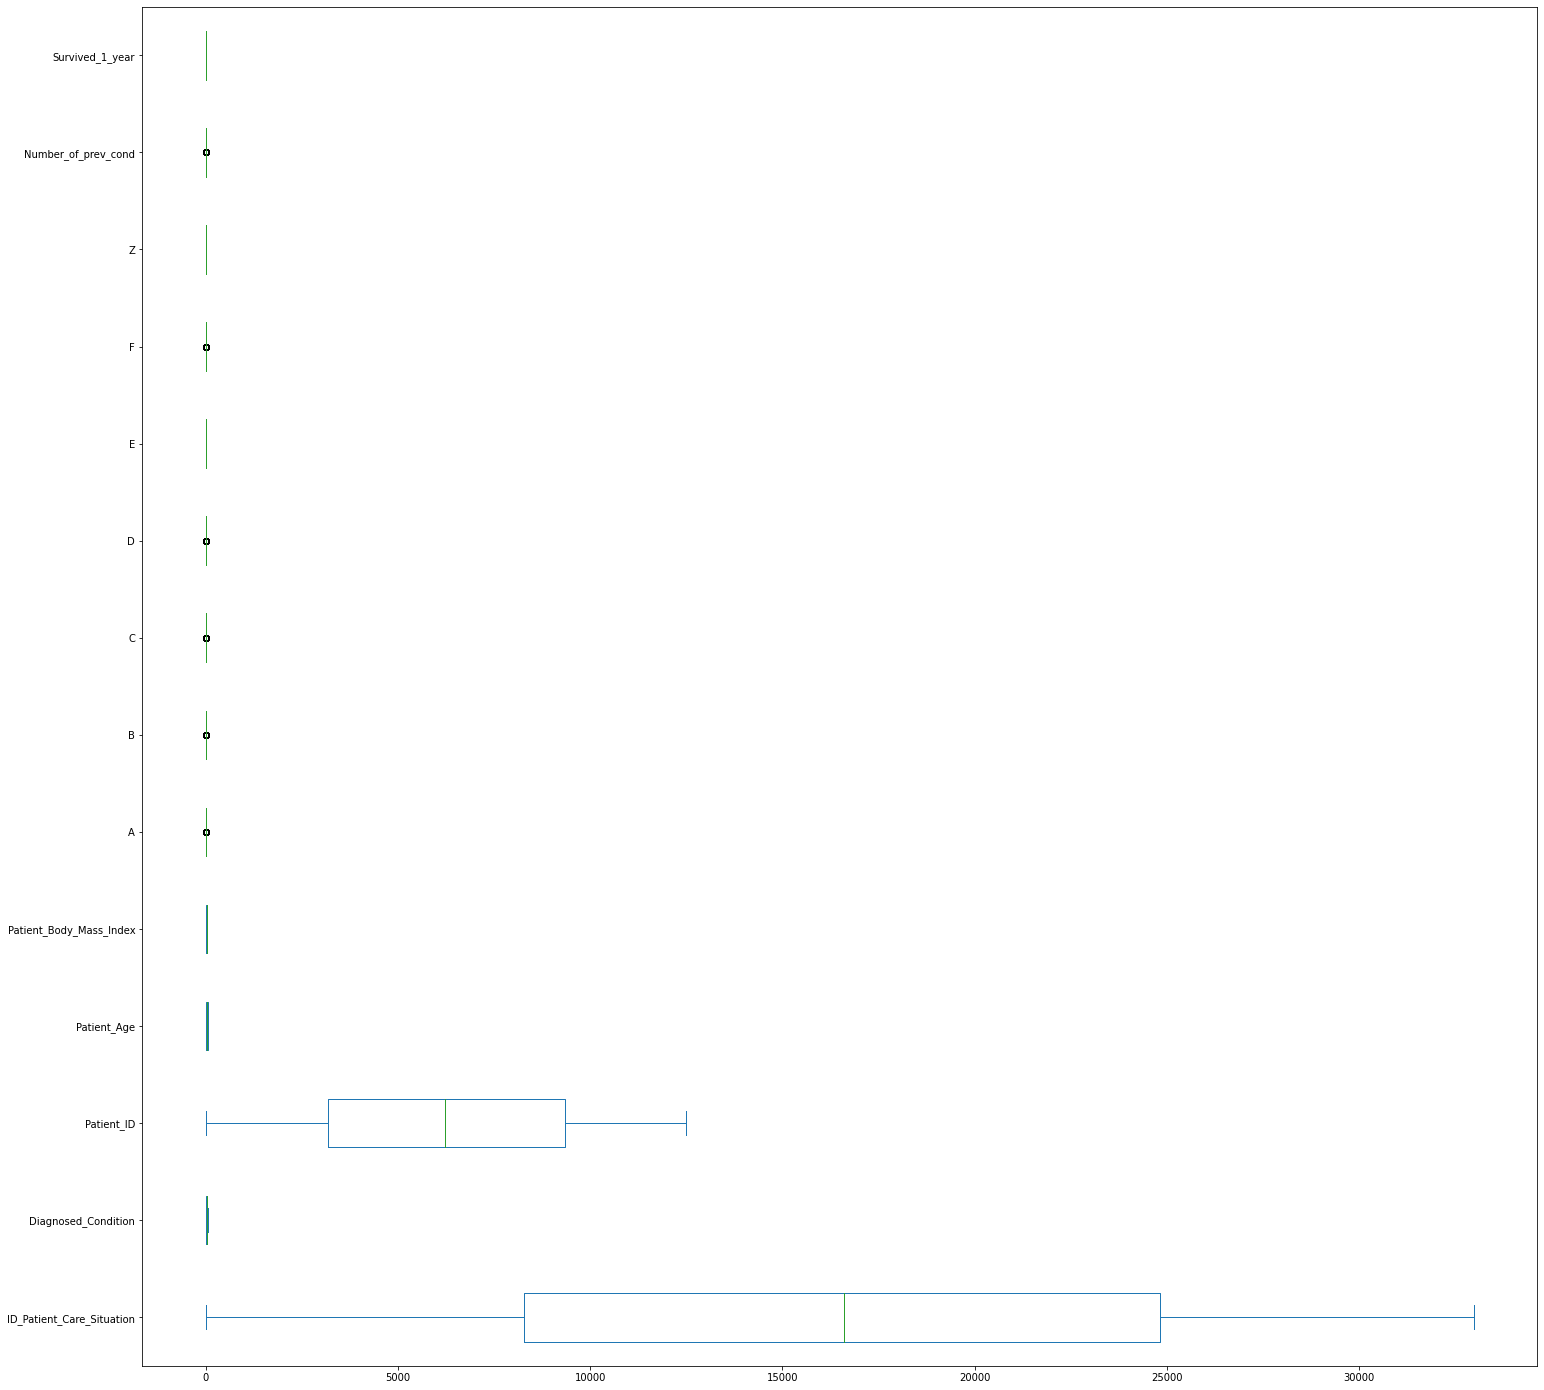

In [533]:
df.plot(kind='box',figsize=(25,25), vert=False)

**No outliers detected. So far the data is very clean**

In [534]:
df01=df.copy()

#EDA

## Number of Patient Who Survived and Did Not

In [535]:
df_survived = df01['Survived_1_year'].value_counts().rename_axis('Survived_1_year').reset_index(name='counts')
df_survived

,Survived_1_year,counts
0,1,14590
1,0,8494


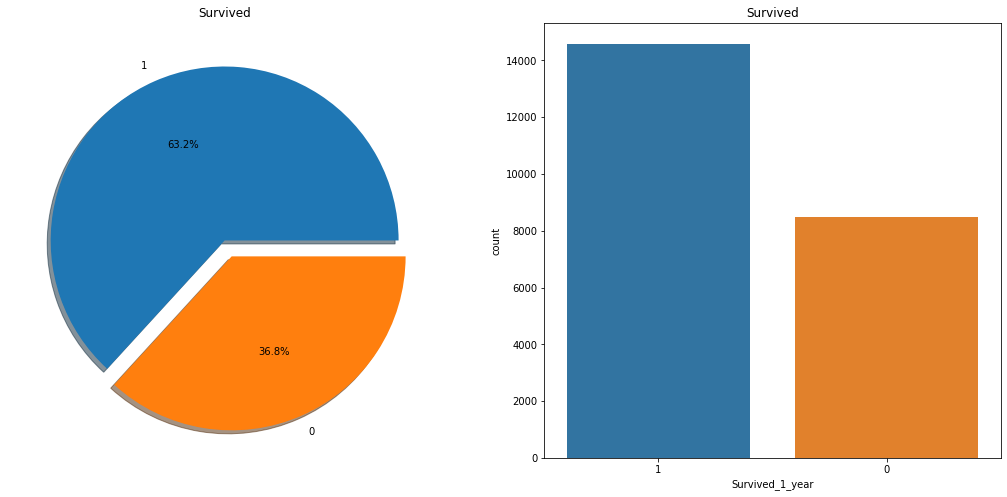

In [536]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df01['Survived_1_year'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x=df01['Survived_1_year'],order = df01['Survived_1_year'].value_counts().index,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

**As we can clearly see that there's imbalanced data between number of patients who survived and patients who did not survive. We'll Take care Imbalanced data later on**

## Patient Who Smoke vs Number of Patients Who Survived

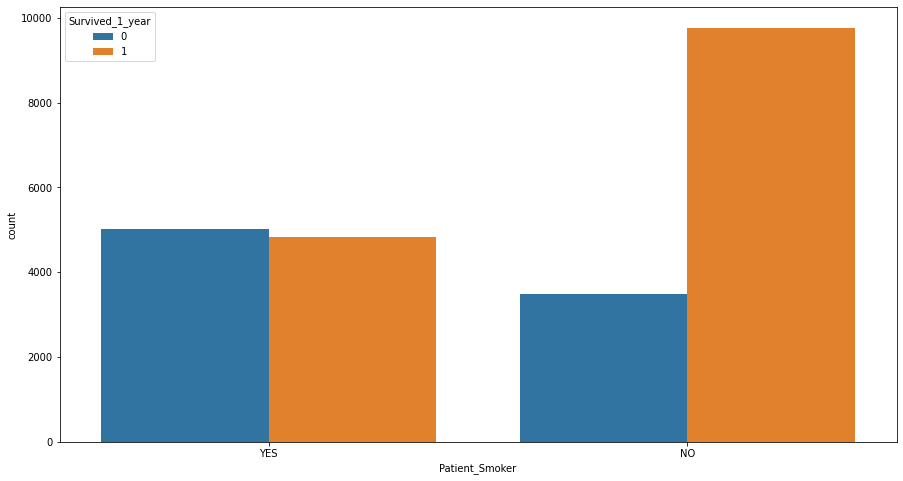

In [537]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Patient_Smoker', hue='Survived_1_year',data=df01, ax=ax)
plt.show()

**Patients who did not smoke clearly have a higher survival rate compared to those who smoke**

## Living Environment vs Survival Rate

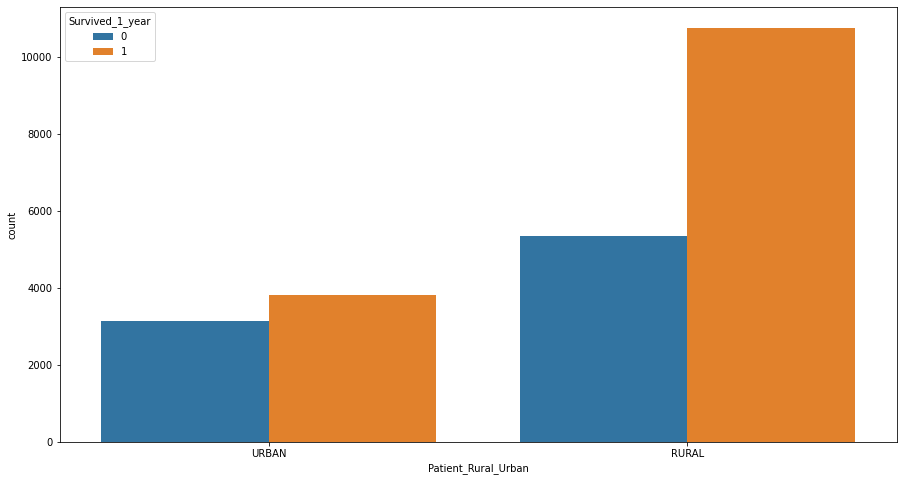

In [538]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Patient_Rural_Urban', hue='Survived_1_year',data=df01, ax=ax)
plt.show()

**It seems that patients who lived in Rural Area have better chance to survive**

## Patient Age Vs Survival Rate

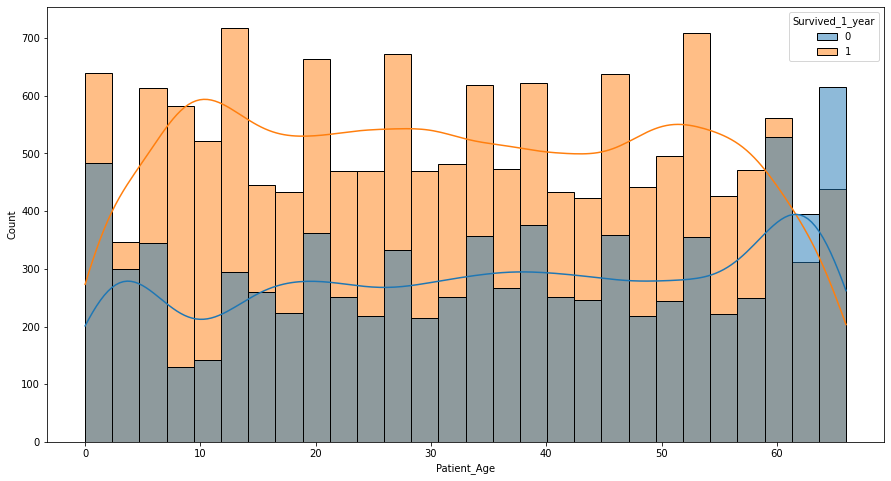

In [539]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.histplot(data = df01,x='Patient_Age', hue='Survived_1_year', kde=True, ax=ax)
plt.show()

**It's clear to see that the older patients, lower the chance to survive**

## Body Mass Index and its reletionship to survival rate

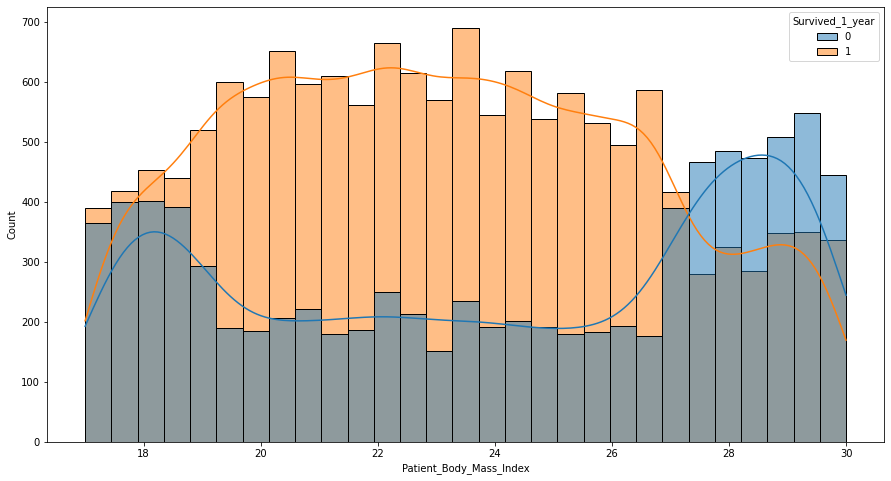

In [540]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.histplot(data = df01,x='Patient_Body_Mass_Index', hue='Survived_1_year', kde=True, ax=ax)
plt.show()

**We can see higher the BMI lower the chance to survive. But on the other hands, lowe BMI (less than ideal?) also pose threat to patients live**

## Number of Previous Condition vs Survival Rate

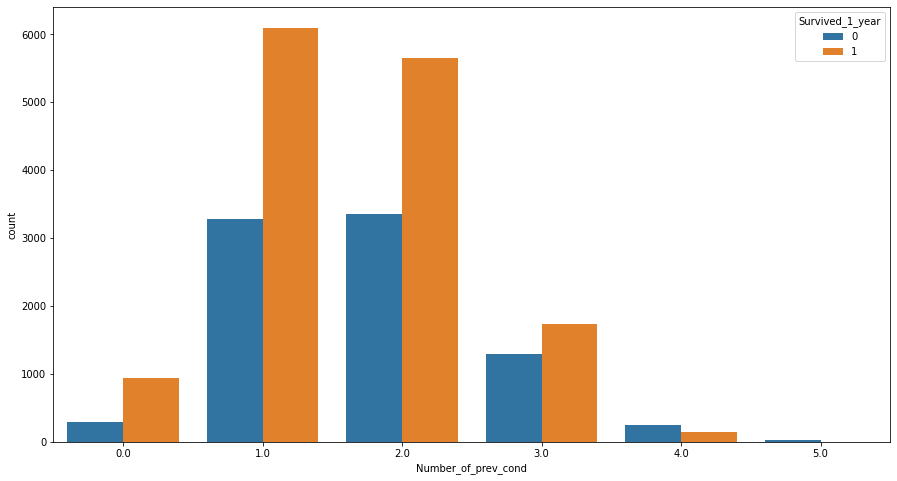

In [541]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Number_of_prev_cond', hue='Survived_1_year',data=df01, ax=ax)
plt.show()

# Preprocessing

In [542]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

## Label Encoder

**We use Label Encoder for Patient Smoker and Rural_Urban since only have two category**

In [543]:
le = LabelEncoder()
df01['Patient_Smoker'] = le.fit_transform(df01['Patient_Smoker'])
df01['Patient_Rural_Urban'] = le.fit_transform(df01['Patient_Rural_Urban'])

In [544]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23084 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23084 non-null  int64  
 1   Diagnosed_Condition        23084 non-null  int64  
 2   Patient_ID                 23084 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23084 non-null  int64  
 5   Patient_Body_Mass_Index    23084 non-null  float64
 6   Patient_Smoker             23084 non-null  int64  
 7   Patient_Rural_Urban        23084 non-null  int64  
 8   Patient_mental_condition   23084 non-null  object 
 9   A                          23084 non-null  float64
 10  B                          23084 non-null  float64
 11  C                          23084 non-null  float64
 12  D                          23084 non-null  float64
 13  E                          23084 non-null  flo

## One Hot Encoding For Treated_with_drugs

In [545]:
df01 = pd.get_dummies(df01, columns = ['Treated_with_drugs'])


In [546]:
df01.columns.to_list()

['ID_Patient_Care_Situation',
 'Diagnosed_Condition',
 'Patient_ID',
 'Patient_Age',
 'Patient_Body_Mass_Index',
 'Patient_Smoker',
 'Patient_Rural_Urban',
 'Patient_mental_condition',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'Z',
 'Number_of_prev_cond',
 'Survived_1_year',
 'Treated_with_drugs_DX1 ',
 'Treated_with_drugs_DX1 DX2 ',
 'Treated_with_drugs_DX1 DX2 DX3 ',
 'Treated_with_drugs_DX1 DX2 DX3 DX4 ',
 'Treated_with_drugs_DX1 DX2 DX3 DX4 DX5 ',
 'Treated_with_drugs_DX1 DX2 DX3 DX5 ',
 'Treated_with_drugs_DX1 DX2 DX4 ',
 'Treated_with_drugs_DX1 DX2 DX4 DX5 ',
 'Treated_with_drugs_DX1 DX2 DX5 ',
 'Treated_with_drugs_DX1 DX3 ',
 'Treated_with_drugs_DX1 DX3 DX4 ',
 'Treated_with_drugs_DX1 DX3 DX4 DX5 ',
 'Treated_with_drugs_DX1 DX3 DX5 ',
 'Treated_with_drugs_DX1 DX4 ',
 'Treated_with_drugs_DX1 DX4 DX5 ',
 'Treated_with_drugs_DX1 DX5 ',
 'Treated_with_drugs_DX2 ',
 'Treated_with_drugs_DX2 DX3 ',
 'Treated_with_drugs_DX2 DX3 DX4 ',
 'Treated_with_drugs_DX2 DX3 DX4 DX5 ',
 'Treated_with_dr

# Feature Engineering

In [547]:
df02=df01.copy()

## Drop Patient Mental Condition

**Since all the values of Patient_mental_condition is only "stable", It's save to drop this column**

In [548]:
df02.drop(['Patient_mental_condition'], axis=1, inplace=True)

In [549]:
df02.columns.to_list()

['ID_Patient_Care_Situation',
 'Diagnosed_Condition',
 'Patient_ID',
 'Patient_Age',
 'Patient_Body_Mass_Index',
 'Patient_Smoker',
 'Patient_Rural_Urban',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'Z',
 'Number_of_prev_cond',
 'Survived_1_year',
 'Treated_with_drugs_DX1 ',
 'Treated_with_drugs_DX1 DX2 ',
 'Treated_with_drugs_DX1 DX2 DX3 ',
 'Treated_with_drugs_DX1 DX2 DX3 DX4 ',
 'Treated_with_drugs_DX1 DX2 DX3 DX4 DX5 ',
 'Treated_with_drugs_DX1 DX2 DX3 DX5 ',
 'Treated_with_drugs_DX1 DX2 DX4 ',
 'Treated_with_drugs_DX1 DX2 DX4 DX5 ',
 'Treated_with_drugs_DX1 DX2 DX5 ',
 'Treated_with_drugs_DX1 DX3 ',
 'Treated_with_drugs_DX1 DX3 DX4 ',
 'Treated_with_drugs_DX1 DX3 DX4 DX5 ',
 'Treated_with_drugs_DX1 DX3 DX5 ',
 'Treated_with_drugs_DX1 DX4 ',
 'Treated_with_drugs_DX1 DX4 DX5 ',
 'Treated_with_drugs_DX1 DX5 ',
 'Treated_with_drugs_DX2 ',
 'Treated_with_drugs_DX2 DX3 ',
 'Treated_with_drugs_DX2 DX3 DX4 ',
 'Treated_with_drugs_DX2 DX3 DX4 DX5 ',
 'Treated_with_drugs_DX2 DX3 DX5 ',
 'Treated_

## Drop Un-necessary Columns

In [550]:
df02.drop(['Patient_ID','ID_Patient_Care_Situation'],axis=1,inplace=True)
df02.drop(['Z'], axis=1, inplace=True)

## Heatmap Correlation

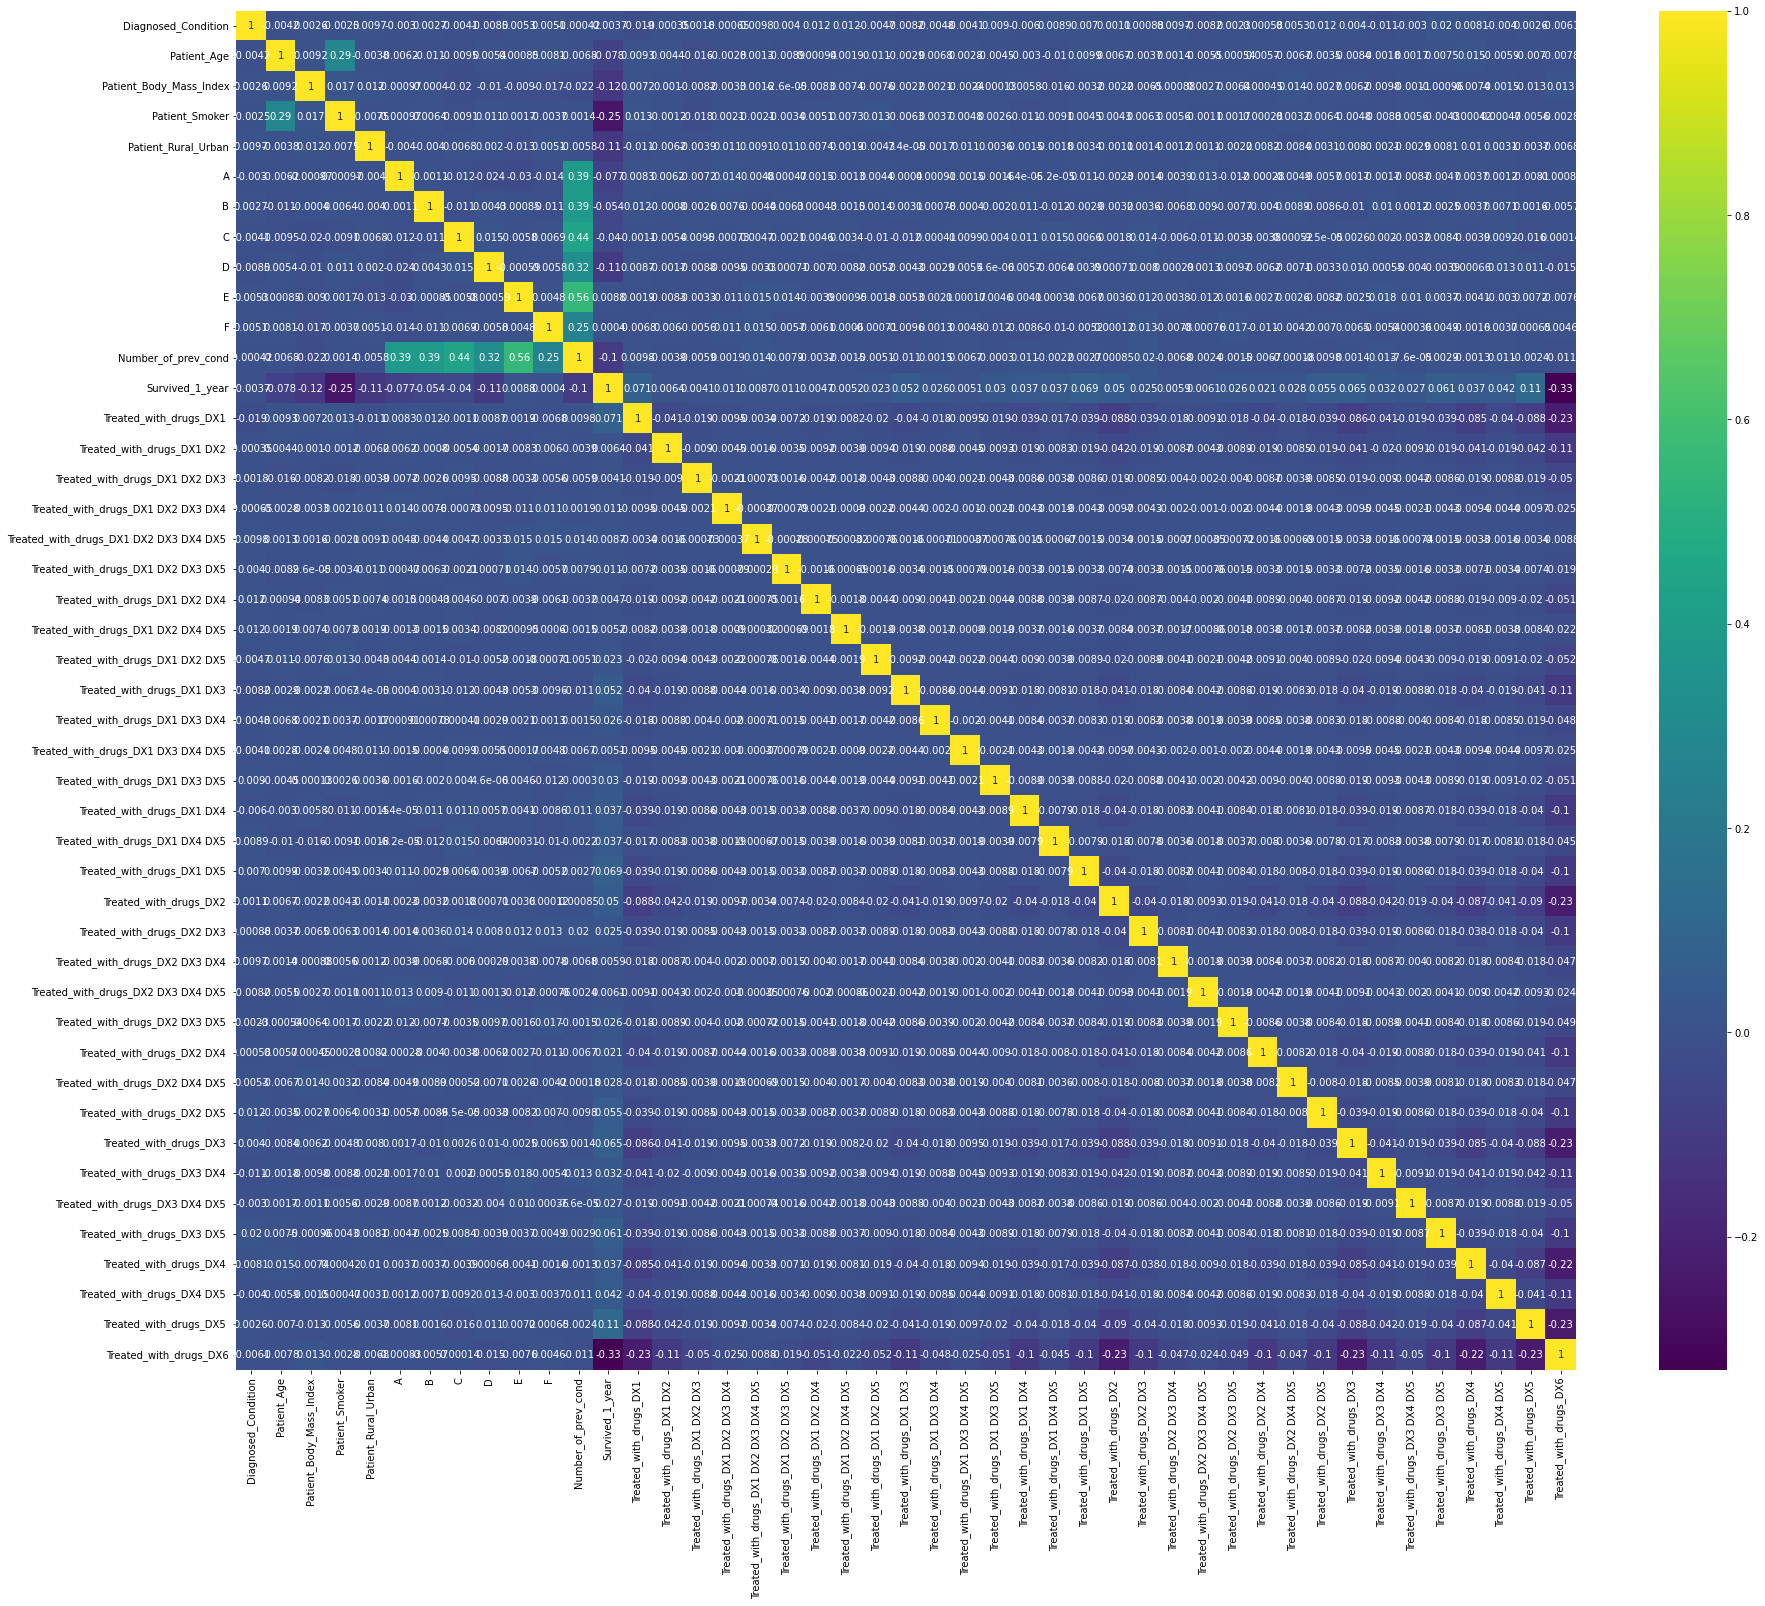

In [551]:
plt.figure(figsize=(30,25))
sns.heatmap(data=df02.corr(), annot=True, cmap='viridis')

**We can see some multi collinearity from Number of Prev Condition since it's basically sum from A, B, C, D and E columns. We can drop this column**

## Drop Number_of_prev_cond

In [552]:

df02.drop(['Number_of_prev_cond'], axis=1, inplace=True)

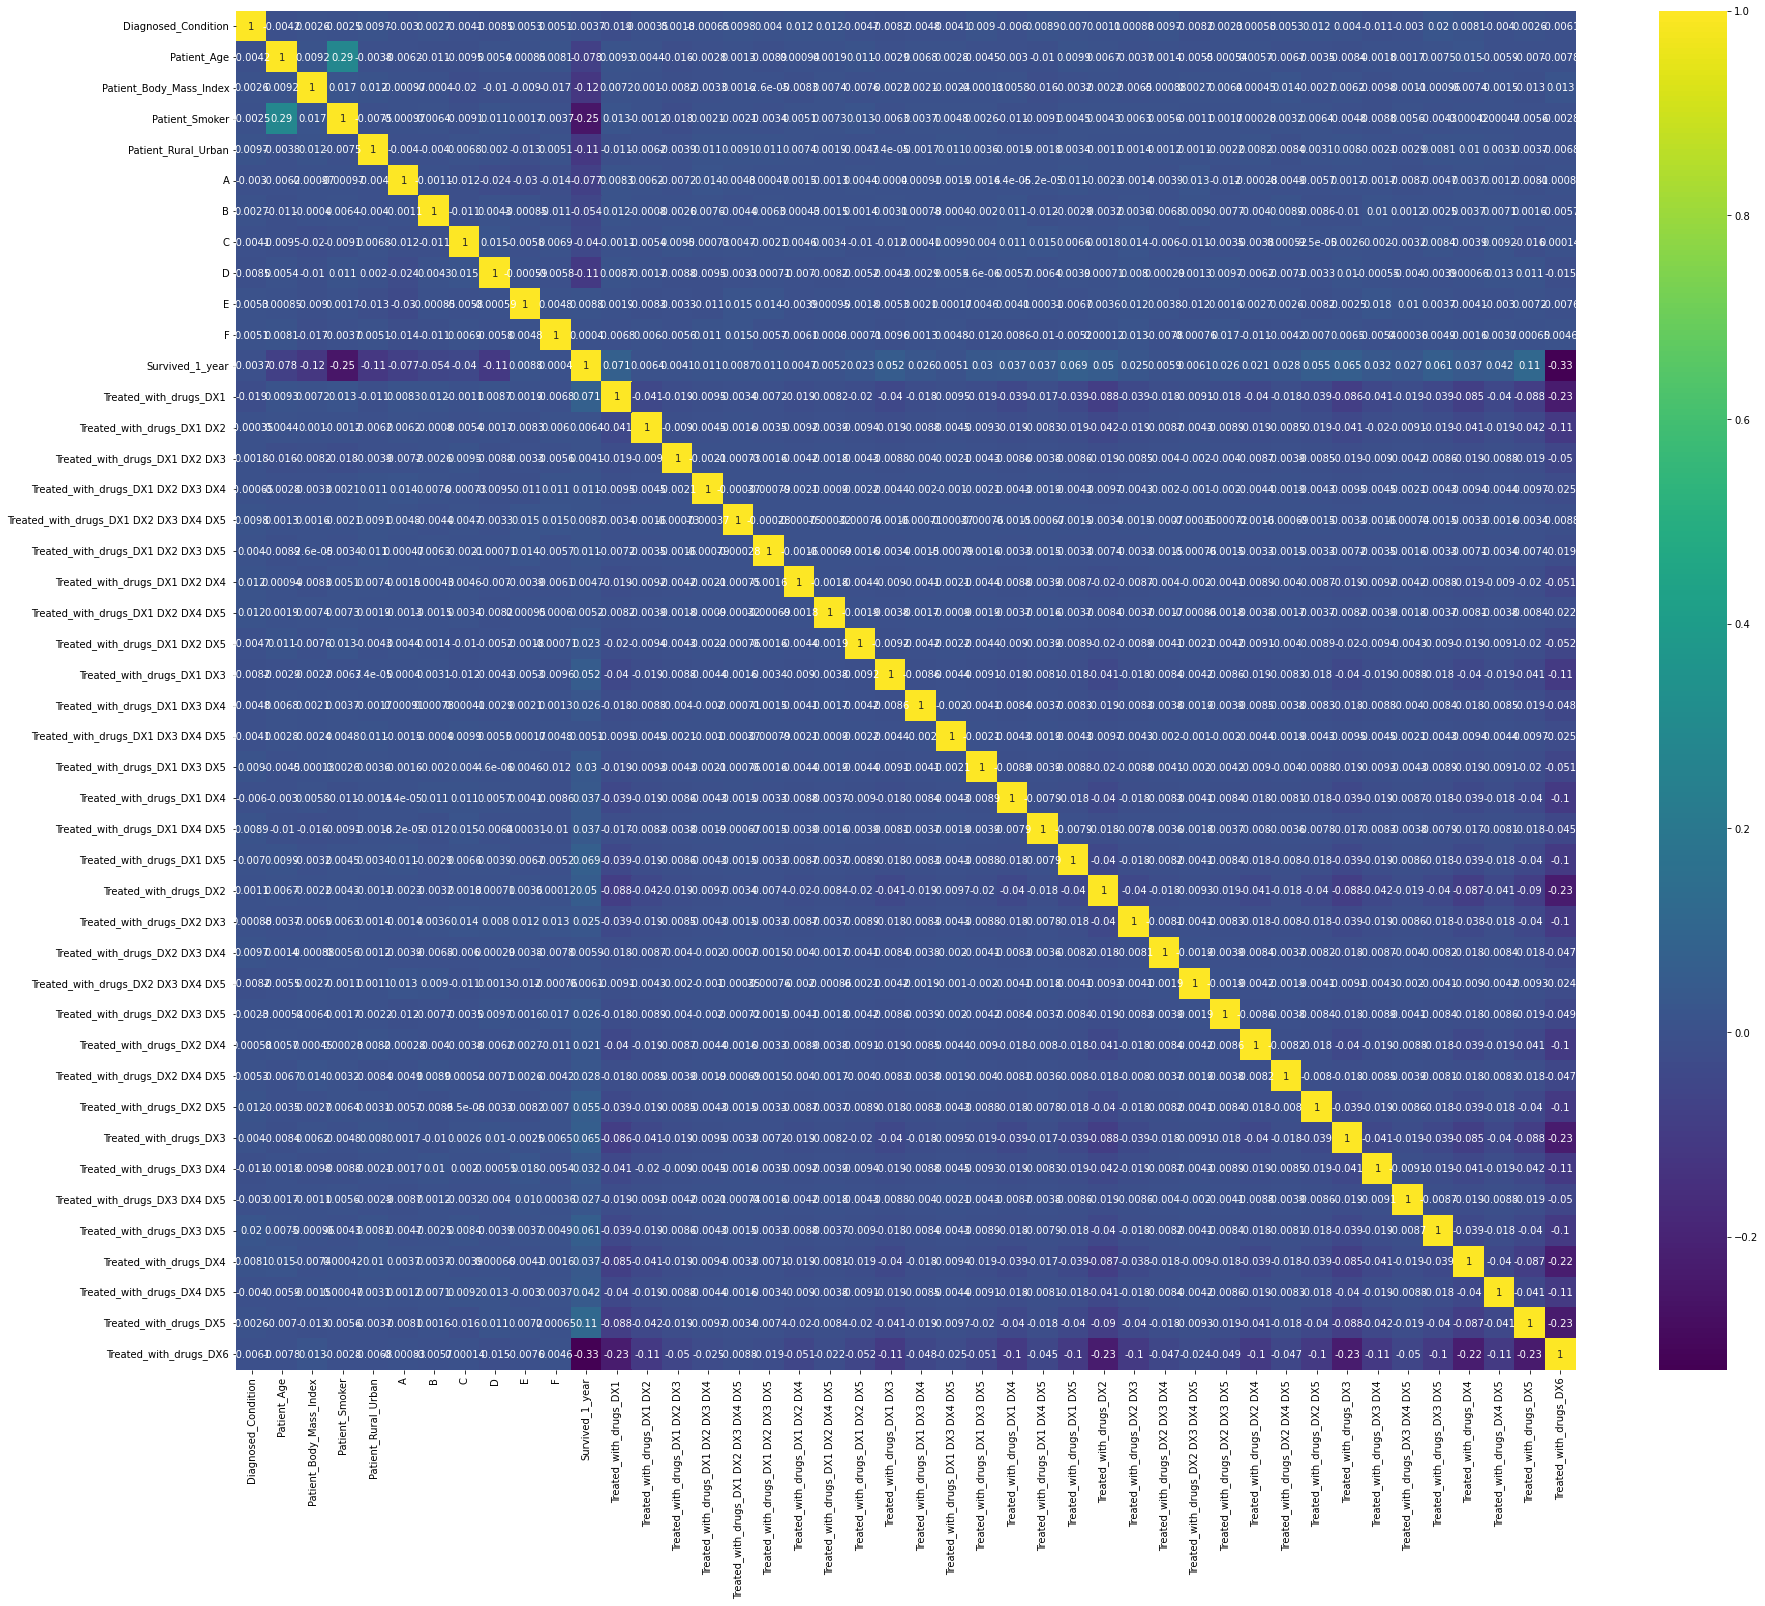

In [553]:
plt.figure(figsize=(30,25))
sns.heatmap(data=df02.corr(), annot=True, cmap='viridis')

In [554]:
df02.shape

(23084, 44)

# Model Training

## Import All Libraries for The Algorithms

In [555]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

## Select all The Features (X) and Label (Y)

In [556]:
X_train =df02.drop(['Survived_1_year'],axis=1)
y_train =df02[['Survived_1_year']]

## Split data into Train and Test Data

In [557]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state=0)

## Train Logistic Regression to Test the effect of Imbalanced

In [558]:
lr=LogisticRegression(solver='liblinear', random_state=0).fit(X_train,y_train)
pred01=lr.predict(X_test)
model=accuracy_score(y_test,pred01)
matrix=confusion_matrix(y_test,pred01)
print(model)
print(matrix)
print(classification_report(y_test, pred01))

0.7331600606454408
[[ 873  837]
 [ 395 2512]]
              precision    recall  f1-score   support

           0       0.69      0.51      0.59      1710
           1       0.75      0.86      0.80      2907

    accuracy                           0.73      4617
   macro avg       0.72      0.69      0.69      4617
weighted avg       0.73      0.73      0.72      4617



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**The accuracy is quite high (73%) but as we can see, the 0 is accuracy is quite low, only 51%

## Handling Imbalanced Data with Oversampling : SMOTE

**Since the number of data is not really that high, we can use oversampling Method

In [559]:
from imblearn.over_sampling import SMOTE

In [560]:
sm = SMOTE(random_state = 2)

In [561]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [562]:
print('After SMOTE, the shape of train_X: {}'.format(X_train_res.shape))

After SMOTE, the shape of train_X: (23366, 43)


In [563]:
print('After SMOTE, the shape of train_X: {}'.format(y_train_res.shape))

After SMOTE, the shape of train_X: (23366, 1)


In [564]:
print("After SMOTE, counts of label '1': {}".format(np.sum(y_train_res == 1)))

After SMOTE, counts of label '1': Survived_1_year    11683
dtype: int64


In [565]:
print("After SMOTE, counts of label '0': {}".format(np.sum(y_train_res == 0)))

After SMOTE, counts of label '0': Survived_1_year    11683
dtype: int64


## Retest the Data after oversampling with Logistic Regression

In [566]:
lr3=LogisticRegression(solver='liblinear', random_state=0).fit(X_train_res,y_train_res)
pred01_res=lr3.predict(X_test)
model_res=accuracy_score(y_test,pred01_res)
matrix_res=confusion_matrix(y_test,pred01_res)
print(model_res)
print(matrix_res)
print(classification_report(y_test, pred01_res))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7221139267922894
[[1071  639]
 [ 644 2263]]
              precision    recall  f1-score   support

           0       0.62      0.63      0.63      1710
           1       0.78      0.78      0.78      2907

    accuracy                           0.72      4617
   macro avg       0.70      0.70      0.70      4617
weighted avg       0.72      0.72      0.72      4617



** As We can clearly see that the 0 accuracy is now improving to 63%

### KNN

In [567]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_res,y_train_res)
pred02=knn.predict(X_test)
model02=accuracy_score(y_test,pred02)
matrix02=confusion_matrix(y_test,pred02)
print(model02)
print(matrix02)
print(classification_report(y_test, pred02))

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6341780376868096
[[1395  315]
 [1374 1533]]
              precision    recall  f1-score   support

           0       0.50      0.82      0.62      1710
           1       0.83      0.53      0.64      2907

    accuracy                           0.63      4617
   macro avg       0.67      0.67      0.63      4617
weighted avg       0.71      0.63      0.64      4617



### Naive Bayes

In [568]:
gnb=GaussianNB()
gnb.fit(X_train_res,y_train_res)
pred03=gnb.predict(X_test)
model03=accuracy_score(y_test,pred03)
matrix03=confusion_matrix(y_test,pred03)
print(model03)
print(matrix03)
print(classification_report(y_test, pred03))

0.4944769330734243
[[1490  220]
 [2114  793]]
              precision    recall  f1-score   support

           0       0.41      0.87      0.56      1710
           1       0.78      0.27      0.40      2907

    accuracy                           0.49      4617
   macro avg       0.60      0.57      0.48      4617
weighted avg       0.65      0.49      0.46      4617



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Decision Tree

In [569]:
dt=DecisionTreeClassifier()
dt.fit(X_train_res,y_train_res)
pred04=dt.predict(X_test)
model04=accuracy_score(y_test,pred04)
matrix04=confusion_matrix(y_test,pred04)
print(model04)
print(matrix04)
print(classification_report(y_test, pred04))

0.761750054147715
[[1197  513]
 [ 587 2320]]
              precision    recall  f1-score   support

           0       0.67      0.70      0.69      1710
           1       0.82      0.80      0.81      2907

    accuracy                           0.76      4617
   macro avg       0.74      0.75      0.75      4617
weighted avg       0.76      0.76      0.76      4617



### Random Forest

In [570]:

rfs=RandomForestClassifier()
rfs.fit(X_train_res,y_train_res)
pred05=rfs.predict(X_test)
model05=accuracy_score(y_test,pred05)
matrix05=confusion_matrix(y_test,pred05)
print(model05)
print(matrix05)
print(classification_report(y_test, pred05))

<ipython-input-570-c57d9cbd3ec1>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfs.fit(X_train_res,y_train_res)


0.8148148148148148
[[1299  411]
 [ 444 2463]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1710
           1       0.86      0.85      0.85      2907

    accuracy                           0.81      4617
   macro avg       0.80      0.80      0.80      4617
weighted avg       0.82      0.81      0.82      4617



### XGB

In [571]:
xgb = XGBClassifier(use_label_encoder=True, eval_metric='mlogloss')

In [572]:
xgb.fit(X_train_res, y_train_res)
pred06=xgb.predict(X_test)
model06=accuracy_score(y_test,pred06)
matrix06=confusion_matrix(y_test,pred06)
print(model06)
print(matrix06)
print(classification_report(y_test, pred06))

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8382066276803118
[[1417  293]
 [ 454 2453]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1710
           1       0.89      0.84      0.87      2907

    accuracy                           0.84      4617
   macro avg       0.83      0.84      0.83      4617
weighted avg       0.84      0.84      0.84      4617



### ADA Boost

In [573]:
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
ada.fit(X_train_res, y_train_res)
pred07=ada.predict(X_test)
model07=accuracy_score(y_test,pred07)
matrix07=confusion_matrix(y_test,pred07)
print(model07)
print(matrix07)
print(classification_report(y_test, pred07))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.816114359974009
[[1322  388]
 [ 461 2446]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.76      1710
           1       0.86      0.84      0.85      2907

    accuracy                           0.82      4617
   macro avg       0.80      0.81      0.80      4617
weighted avg       0.82      0.82      0.82      4617



## Can we Improve the XGB Accuracy?

In [574]:
model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.1,  
                      colsample_bytree = 0.4,
                      subsample = 1,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=5, 
                      gamma=10)

### Improvement on the XGB

In [575]:
model.fit(X_train_res, y_train_res)
pred08=xgb.predict(X_test)
model08=accuracy_score(y_test,pred08)
matrix08=confusion_matrix(y_test,pred08)
print(model08)
print(matrix08)
print(classification_report(y_test, pred08))

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8382066276803118
[[1417  293]
 [ 454 2453]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1710
           1       0.89      0.84      0.87      2907

    accuracy                           0.84      4617
   macro avg       0.83      0.84      0.83      4617
weighted avg       0.84      0.84      0.84      4617



**Looks like already stable at 84% of Accuracy, hence we can use the XGB for our prediction on test data**

# Load The Test Dataset

In [576]:
url_df = 'https://drive.google.com/file/d/1KhuMCCiwT8g_RkLYa0hakeiiKoJyzXbv/view?usp=sharing'
path_df = 'https://drive.google.com/uc?export=download&id='+url_df.split('/')[-2]
dftest = pd.read_csv(path_df)

In [577]:
dftest.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [578]:
dftest01=dftest.copy()

## Drop All Un-necessary Columns

In [581]:
dftest01.drop(['ID_Patient_Care_Situation','Patient_ID','Patient_mental_condition','Z','Number_of_prev_cond'],axis=1, inplace=True)

In [582]:
dftest01.columns.to_list()

['Diagnosed_Condition',
 'Treated_with_drugs',
 'Patient_Age',
 'Patient_Body_Mass_Index',
 'Patient_Smoker',
 'Patient_Rural_Urban',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F']

## Label Encoding Patient Smoker and Patient Rural Urban

In [583]:
dftest01['Patient_Smoker'] = le.fit_transform(dftest01['Patient_Smoker'])
dftest01['Patient_Rural_Urban'] = le.fit_transform(dftest01['Patient_Rural_Urban'])

## One Hot Encoding For Treated With Drugs

In [584]:
dftest01 = pd.get_dummies(dftest01, columns = ['Treated_with_drugs'])


## Predict using Trained XGB

In [585]:
dftest01['prediction']=xgb.predict(dftest01)
dftest01

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,...,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,prediction
0,40,16,29.443894,0,0,1.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
1,52,24,26.836321,0,1,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
2,50,63,25.523280,0,0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,1
3,32,42,27.171155,0,1,1.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,20,50,25.556192,0,0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,11,28,29.106314,0,0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
9299,7,4,20.616673,0,1,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
9300,16,20,24.727357,1,1,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
9301,50,33,17.517426,0,1,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [586]:
dfpredict=dftest01.loc[:, ['prediction']]
dfpredict.head()

,prediction
0,1
1,1
2,1
3,0
4,1


In [587]:
dfpredict.to_csv('predictionsubs.csv', index=False)